In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
athletes=pd.read_csv('athlete_events.csv')
region =pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
#join the dataframes
athletes_df=athletes.merge(region, how='left', on='NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
#
athletes_df.shape

(271116, 17)

In [7]:
#column names consistent
athletes_df.rename(columns={'region':'Region','notes':'Notes'}, inplace=True)

In [8]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
#mean,median,statistical values
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
#check for null values
nan_values= athletes_df.isna()
nan_columns =nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [11]:
#total no. of null values
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [12]:
#list columns with null values
athletes_df.columns[athletes_df.isnull().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [13]:
#kenya details
athletes_df.query('Team == "Kenya"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
769,442,"Catherine ""Kate"" Abilla Awino",F,27.0,162.0,56.0,Kenya,KEN,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,NaN,Kenya,NaN
1073,603,Juma Abudu,M,24.0,170.0,59.0,Kenya,KEN,1988 Summer,1988,Summer,Seoul,Weightlifting,Weightlifting Men's Featherweight,NaN,Kenya,NaN
1377,779,Shuaib Adam,M,30.0,175.0,80.0,Kenya,KEN,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN,Kenya,NaN
1378,779,Shuaib Adam,M,35.0,175.0,80.0,Kenya,KEN,1988 Summer,1988,Summer,Seoul,Shooting,"Shooting Men's Air Pistol, 10 metres",NaN,Kenya,NaN
1379,779,Shuaib Adam,M,35.0,175.0,80.0,Kenya,KEN,1988 Summer,1988,Summer,Seoul,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN,Kenya,NaN


In [14]:
#jamaica details
athletes_df.query('Team == "Jamaica"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
1539,854,Derrick Adamson,M,26.0,177.0,72.0,Jamaica,JAM,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Marathon,NaN,Jamaica,NaN
1540,854,Derrick Adamson,M,30.0,177.0,72.0,Jamaica,JAM,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,NaN,Jamaica,NaN
4048,2334,Samantha Albert (Majendie-),F,37.0,165.0,59.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN,Jamaica,NaN
4049,2334,Samantha Albert (Majendie-),F,41.0,165.0,59.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN,Jamaica,NaN
4285,2451,Peter Aldridge,M,19.0,173.0,69.0,Jamaica,JAM,1980 Summer,1980,Summer,Moskva,Cycling,"Cycling Men's Road Race, Individual",NaN,Jamaica,NaN


In [15]:
#top countries participating
top_10_countries=athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

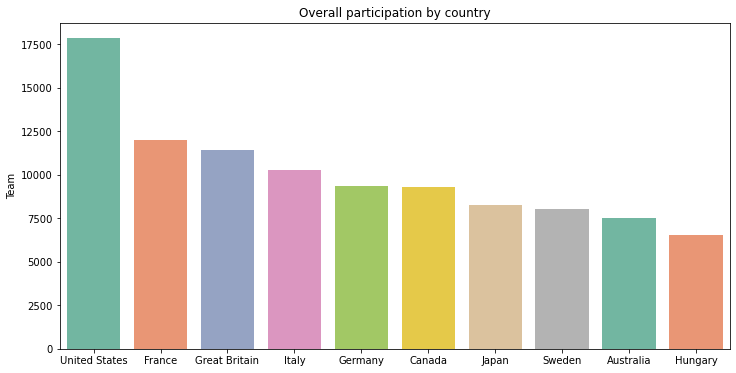

In [16]:
#The module couldnot be called error-You have imported the matplotlib module itself as plt, where you should be importing the pyplot module as plt instead:
#plot for thetop 10 countries
plt.figure(figsize=(12,6))
plt.title('Overall participation by country')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette ='Set2');

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

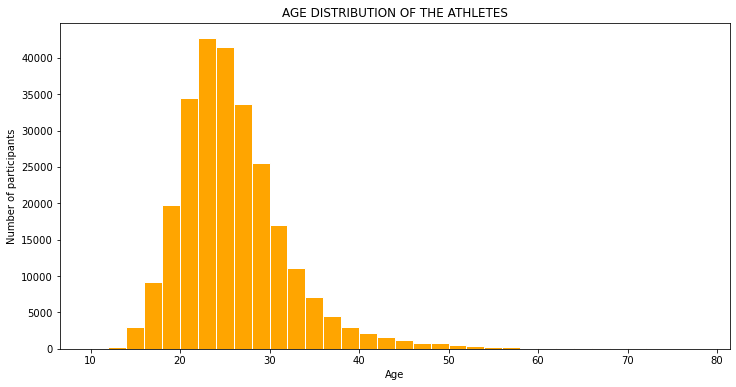

In [17]:
#age distrribution of the participants
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title('AGE DISTRIBUTION OF THE ATHLETES')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athletes_df.Age, bins =np.arange(10,80,2),color='orange', edgecolor ='white')

In [18]:
#winter games
winter_sports = athletes_df[athletes_df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [19]:
#summer games 
summer_sports=athletes_df[athletes_df.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [20]:
#male and female participants
gender_counts =athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

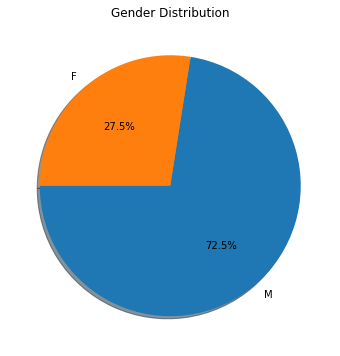

In [21]:
#pie plot for male and female athletes, autopct parameter enables you to display the percentage value using python string format
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180,shadow=True);

In [22]:
#Total medals
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [23]:
#Total female athletes have particpated in each olympic
female_participants= athletes_df[(athletes_df.Sex=='F')&(athletes_df.Season=='Summer')][['Sex','Year']]
female_participants=female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [24]:
womenOlympics =athletes_df[(athletes_df.Sex =='F')&(athletes_df.Season =='Summer')]

Text(0.5, 1.0, 'Women participation')

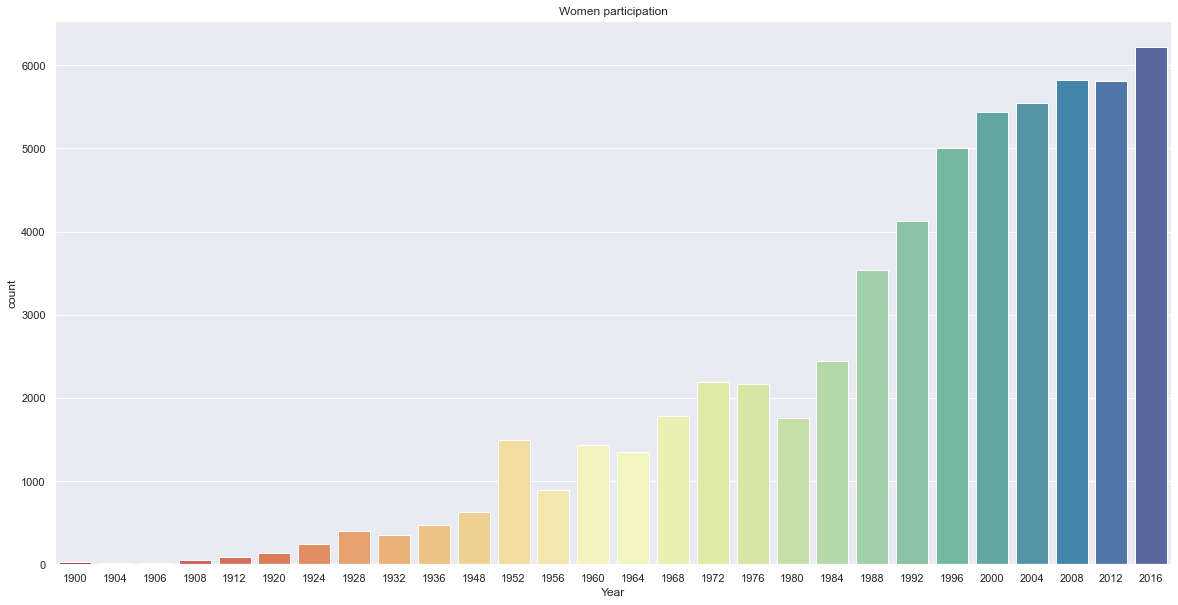

In [25]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=womenOlympics, palette='Spectral')
plt.title('Women participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

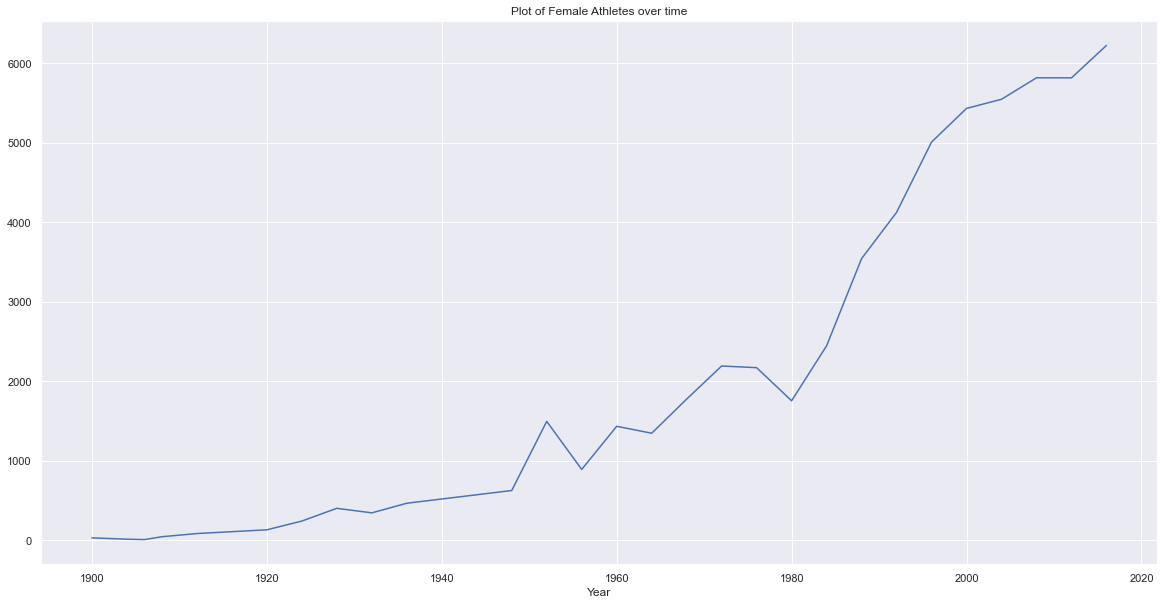

In [26]:
part =womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

In [27]:
#Gold medal athletes
goldMedals =athletes_df[(athletes_df.Medal=='Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [28]:
#Take only the values that are different from NaN
goldMedals =goldMedals[np.isfinite(goldMedals['Age'])]

In [29]:
#Gold beyond age of 60
goldMedals['ID'][goldMedals['Age']>60].count()

6

In [30]:
#check where the above medals have come from
sporting_events =goldMedals['Sport'][goldMedals['Age']>60]
sporting_events

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\azamm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold Medals for Athletes over 60 years')

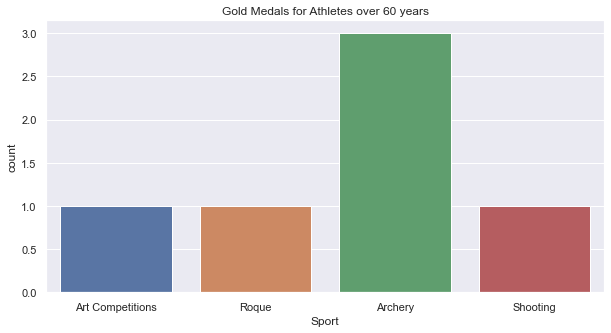

In [31]:
#plot for the sporting events
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_events)
plt.title('Gold Medals for Athletes over 60 years')

In [32]:
#Gold medals from each country
goldMedals.Region.value_counts().reset_index(name='Medal').head()

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


In [33]:
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [34]:
r=goldMedals[(goldMedals.Team=='Russia')]
r.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
2941,1639,Albina Khamitovna Akhatova,F,29.0,160.0,55.0,Russia,RUS,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Women's 4 x 6 kilometres Relay,Gold,Russia,NaN
2961,1649,Artur Kamilevich Akhmatkhuzin,M,28.0,187.0,79.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Men's Foil, Team",Gold,Russia,NaN
4092,2359,Islam-Beka Said-Tsilimovich Albiyev,M,19.0,165.0,66.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",Gold,Russia,NaN
4784,2735,Sergey Gennadyevich Alifirenko,M,41.0,168.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Gold,Russia,NaN
4816,2755,Aleksey Aleksandrovich Alipov,M,29.0,175.0,80.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Shooting,Shooting Men's Trap,Gold,Russia,NaN


In [35]:
#year russia had the most gold medals
r['Year'].value_counts()

2000    66
2016    50
2012    50
2004    48
2008    43
1996    36
2014    25
1994    15
2006    12
1998    10
2010     6
2002     4
1908     1
Name: Year, dtype: int64

Text(0.5, 1.0, 'Gold Medals per Year Russia')

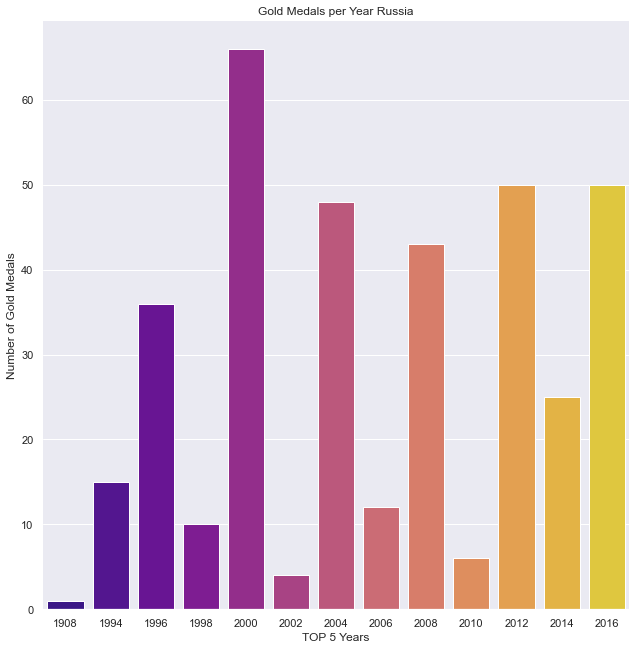

In [36]:
maxr=r.Year.value_counts().reset_index(name='Medal')
 
#totalGoldMedals =goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
g=sns.catplot(x="index", y="Medal", data=maxr,
             height=9, kind="bar", palette ='plasma')
g.despine(left=True)
g.set_xlabels("TOP 5 Years")
g.set_ylabels("Number of Gold Medals")
plt.title('Gold Medals per Year Russia')

Text(0.5, 1.0, 'Gold Medals per Country')

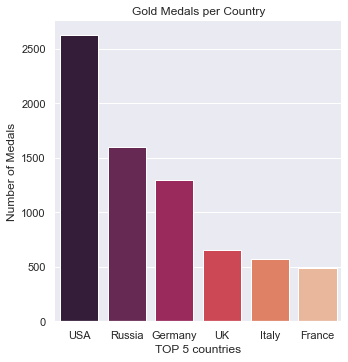

In [37]:
#for medals per counrty
totalGoldMedals =goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
g=sns.catplot(x="index", y="Medal", data=totalGoldMedals,
             height=5, kind="bar", palette ='rocket')
g.despine(left=True)
g.set_xlabels("TOP 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Gold Medals per Country')

In [40]:
#Rio olympics
max_year=athletes_df.Year.max()
print(max_year)
team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal =='Gold')].Team
team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise Medals for the year 2016')

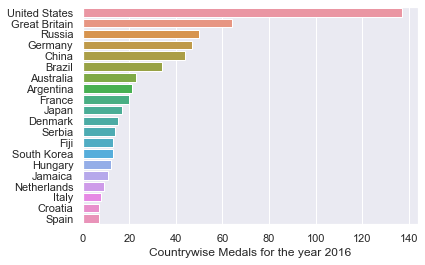

In [41]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.ylabel(None);
plt.xlabel('Countrywise Medals for the year 2016')

In [43]:
#only won medal
not_null_medals= athletes_df[(athletes_df['Height'].notnull())& (athletes_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

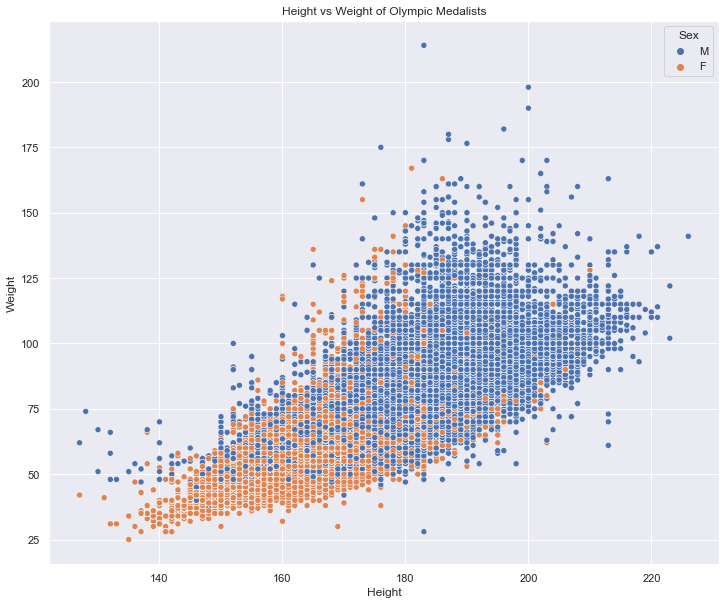

In [46]:
plt.figure(figsize=(12,10))
axis = sns.scatterplot(x="Height", y="Weight", data=not_null_medals, hue="Sex")
plt.title('Height vs Weight of Olympic Medalists')